Sebastian Eriksson

#Setup

##Import libraries

Importing all libraries that are needed for both data analysis and modeling

In [ ]:
# Import needed libraries
import tensorflow as tf
print('TensorFlow version:', tf.__version__)

# Helper libraries
import numpy as np
import sklearn
from   sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Matlab plotting
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

import pandas as pd

TensorFlow version: 2.9.2


In [ ]:
# Test for GPU and determine what GPU we have
import sys
if not tf.config.list_physical_devices('GPU'):
     print("No GPU was detected. CNNs can be very slow without a GPU.")
     IN_COLAB = 'google.colab' in sys.modules
     if IN_COLAB:
         print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")
else:
     !nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-59f69bee-caf0-7119-b79c-c251a92c2fcd)


##Import files

Here I am importing the files from the kaggle competition that I downloaded. I use google colabs API to import the files from my computer and then rename them using pandas

In [ ]:
from google.colab import files
 
 
train, test = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [ ]:
df_train.shape

(1460, 81)

###Modifying the files

Here I remove the ID column as it does not really say anything about the data. I then replace invalid numbers and categories that contain 'N/A'

In [ ]:
id_columns = df_test['Id']
data_full=pd.concat([df_train.iloc[:,:-1],df_test],axis=0)
data_full = data_full.drop(columns=['Id'],axis=1)

In [ ]:
numbers = [collname for collname in data_full.columns if data_full[collname].dtype in ['int64', 'float64']]
categories = [collname for collname in data_full.columns if data_full[collname].dtype == "object"]
values = {}
for i in categories:
    values[i] = 'N/A'

for i in numbers:
    values[i] = data_full[i].median()
        
data_full.fillna(value=values,inplace=True)

print(data_full.head())

   MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   N/A      Reg   
1          20       RL         80.0     9600   Pave   N/A      Reg   
2          60       RL         68.0    11250   Pave   N/A      IR1   
3          70       RL         60.0     9550   Pave   N/A      IR1   
4          60       RL         84.0    14260   Pave   N/A      IR1   

  LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
0         Lvl    AllPub    Inside  ...           0        0    N/A   N/A   
1         Lvl    AllPub       FR2  ...           0        0    N/A   N/A   
2         Lvl    AllPub    Inside  ...           0        0    N/A   N/A   
3         Lvl    AllPub    Corner  ...           0        0    N/A   N/A   
4         Lvl    AllPub       FR2  ...           0        0    N/A   N/A   

  MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         N/A       0       2    2008        WD         N

###OneHotEncoding

In order to convert the categorical columns to a numerical value for the model I use OneHotEncoding to convert the values of the categories to ones and zeros.

In [ ]:
def OneHotEncode(data,columns):
    return pd.get_dummies(data,columns = columns)

category_cols = [collname for collname in data_full.columns if data_full[collname].dtype == "object"]
data_full = OneHotEncode(data_full, category_cols)
data_full.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_N/A,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
data_full.shape

(2919, 311)

###Split and tranform the data

In [ ]:
#spliting the data into train and test datasets
train_data=data_full.iloc[:1460,:]
test_data=data_full.iloc[1460:,:]
print(train_data.shape)
test_data.shape

(1460, 311)


(1459, 311)

In [ ]:
scale = StandardScaler()
X_train = train_data
X_train = scale.fit_transform(X_train)
y = df_train['SalePrice']

seed = 7
np.random.seed(seed)
X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.33, random_state=seed)

In [ ]:
print(X_train)

[[-0.87256276 -0.07654429  0.70988987 ... -0.11785113  0.4676514
  -0.30599503]
 [ 0.07337496  0.10502299 -0.00539476 ... -0.11785113  0.4676514
  -0.30599503]
 [ 1.49228154 -1.21133978 -0.34725211 ... -0.11785113  0.4676514
  -0.30599503]
 ...
 [-0.87256276 -0.07654429  0.22230969 ... -0.11785113  0.4676514
  -0.30599503]
 [-0.87256276 -0.16732793 -0.27228603 ... -0.11785113 -2.13834494
  -0.30599503]
 [-0.87256276  0.64972483  0.21028305 ... -0.11785113  0.4676514
  -0.30599503]]


#Model

In [ ]:
model_dense1 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1),
])

model_dense1.compile(loss='mean_squared_error', optimizer='adam', metrics =['mae'])

es=tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

history =  model_dense1.fit(
    X_train, y_train,
    validation_data=(X_test,y_test),
    batch_size=32,
    epochs=1500,
    verbose=1,
    callbacks=[es]
)

history = pd.DataFrame(history.history)

Epoch 1/1500
16/16 [==============================] - 3s 12ms/step - loss: 38028513280.0000 - mae: 179315.1250 - val_loss: 41088737280.0000 - val_mae: 184177.0156
Epoch 2/1500
16/16 [==============================] - 0s 5ms/step - loss: 38027784192.0000 - mae: 179313.6094 - val_loss: 41087979520.0000 - val_mae: 184175.4844
Epoch 3/1500
16/16 [==============================] - 0s 4ms/step - loss: 38026878976.0000 - mae: 179311.6719 - val_loss: 41086971904.0000 - val_mae: 184173.4062
Epoch 4/1500
16/16 [==============================] - 0s 4ms/step - loss: 38025707520.0000 - mae: 179309.2188 - val_loss: 41085612032.0000 - val_mae: 184170.6719
Epoch 5/1500
16/16 [==============================] - 0s 5ms/step - loss: 38024163328.0000 - mae: 179306.0000 - val_loss: 41083891712.0000 - val_mae: 184167.1875
Epoch 6/1500
16/16 [==============================] - 0s 5ms/step - loss: 38022295552.0000 - mae: 179302.1250 - val_loss: 41081786368.0000 - val_mae: 184162.9375
Epoch 7/1500
16/16 [=======

In [ ]:
prediction1 = model_dense1.predict(X_test)

16/16 [==============================] - 0s 2ms/step


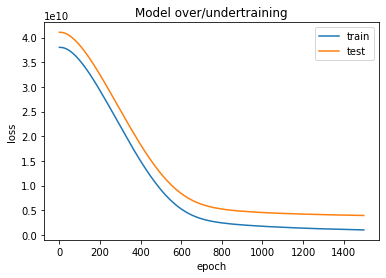

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model over/undertraining')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
plt.clf()

In [ ]:
model_dense2 = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1),
])

model_dense2.compile(loss='mean_squared_error', optimizer='adam', metrics =['mae'])

history =  model_dense2.fit(
    X_train, y_train,
    batch_size=32,
    epochs=1500,
    verbose=1,
    validation_data=(X_test,y_test),
    callbacks=[es]
)

history = pd.DataFrame(history.history)

Epoch 1/1500
16/16 [==============================] - 1s 12ms/step - loss: 38025867264.0000 - mae: 179308.0312 - val_loss: 41081753600.0000 - val_mae: 184159.9062
Epoch 2/1500
16/16 [==============================] - 0s 5ms/step - loss: 38014787584.0000 - mae: 179282.0469 - val_loss: 41062842368.0000 - val_mae: 184119.4531
Epoch 3/1500
16/16 [==============================] - 0s 5ms/step - loss: 37985017856.0000 - mae: 179218.5000 - val_loss: 41015926784.0000 - val_mae: 184023.4375
Epoch 4/1500
16/16 [==============================] - 0s 4ms/step - loss: 37915029504.0000 - mae: 179074.0625 - val_loss: 40915972096.0000 - val_mae: 183820.4219
Epoch 5/1500
16/16 [==============================] - 0s 5ms/step - loss: 37784059904.0000 - mae: 178796.7969 - val_loss: 40735166464.0000 - val_mae: 183451.9688
Epoch 6/1500
16/16 [==============================] - 0s 4ms/step - loss: 37557653504.0000 - mae: 178323.3906 - val_loss: 40440168448.0000 - val_mae: 182847.1875
Epoch 7/1500
16/16 [=======

In [ ]:
prediction2 = model_dense2.predict(X_test)

16/16 [==============================] - 0s 2ms/step


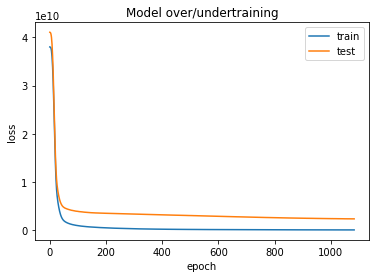

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model over/undertraining')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
plt.clf()

In [ ]:
model_dense3 = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(384, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1),
])

model_dense3.compile(loss='mean_squared_error', optimizer='adam', metrics =['mae'])

history =  model_dense3.fit(
    X_train, y_train,
    batch_size=32,
    epochs=500,
    verbose=1,
    validation_data=(X_test,y_test),
    callbacks=[es]
)

history = pd.DataFrame(history.history)

Epoch 1/500
16/16 [==============================] - 1s 13ms/step - loss: 38022254592.0000 - mae: 179297.5156 - val_loss: 41061675008.0000 - val_mae: 184108.8438
Epoch 2/500
16/16 [==============================] - 0s 5ms/step - loss: 37939646464.0000 - mae: 179098.9844 - val_loss: 40849051648.0000 - val_mae: 183635.3750
Epoch 3/500
16/16 [==============================] - 0s 5ms/step - loss: 37456510976.0000 - mae: 178030.8281 - val_loss: 39860731904.0000 - val_mae: 181544.9688
Epoch 4/500
16/16 [==============================] - 0s 8ms/step - loss: 35666124800.0000 - mae: 174194.8906 - val_loss: 36745220096.0000 - val_mae: 174839.0938
Epoch 5/500
16/16 [==============================] - 0s 5ms/step - loss: 30781165568.0000 - mae: 162793.4375 - val_loss: 29223383040.0000 - val_mae: 157001.1719
Epoch 6/500
16/16 [==============================] - 0s 5ms/step - loss: 20938285056.0000 - mae: 135966.6719 - val_loss: 17451325440.0000 - val_mae: 119518.1406
Epoch 7/500
16/16 [==============

In [ ]:
prediction3 = model_dense3.predict(X_test)

16/16 [==============================] - 0s 1ms/step


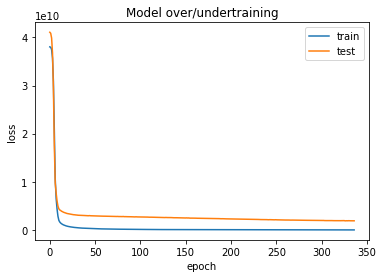

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model over/undertraining')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
plt.clf()

In [ ]:
model_dense4 = tf.keras.Sequential([
    tf.keras.layers.Dense(384, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1),
])

model_dense4.compile(loss='mean_squared_error', optimizer='adam', metrics =['mae'])

history =  model_dense4.fit(
    X_train, y_train,
    batch_size=32,
    epochs=500,
    verbose=1,
    validation_data=(X_test,y_test),
    callbacks=[es]
)

history = pd.DataFrame(history.history)

Epoch 1/500
16/16 [==============================] - 1s 14ms/step - loss: 38023593984.0000 - mae: 179301.9219 - val_loss: 41064669184.0000 - val_mae: 184117.3750
Epoch 2/500
16/16 [==============================] - 0s 6ms/step - loss: 37924040704.0000 - mae: 179062.9219 - val_loss: 40749543424.0000 - val_mae: 183412.5625
Epoch 3/500
16/16 [==============================] - 0s 6ms/step - loss: 36957167616.0000 - mae: 176921.4531 - val_loss: 38438903808.0000 - val_mae: 178407.3750
Epoch 4/500
16/16 [==============================] - 0s 5ms/step - loss: 31702050816.0000 - mae: 164915.7188 - val_loss: 28244783104.0000 - val_mae: 154035.6562
Epoch 5/500
16/16 [==============================] - 0s 5ms/step - loss: 16514907136.0000 - mae: 117720.6797 - val_loss: 10006060032.0000 - val_mae: 81663.0781
Epoch 6/500
16/16 [==============================] - 0s 6ms/step - loss: 6087843328.0000 - mae: 67544.5469 - val_loss: 6443041792.0000 - val_mae: 62930.3516
Epoch 7/500
16/16 [===================

In [ ]:
prediction4 = model_dense4.predict(X_test)

16/16 [==============================] - 0s 2ms/step


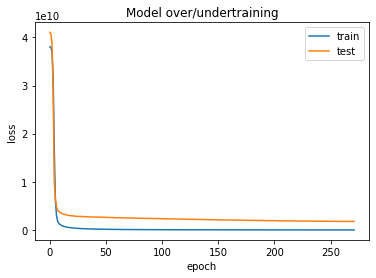

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model over/undertraining')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
plt.clf()

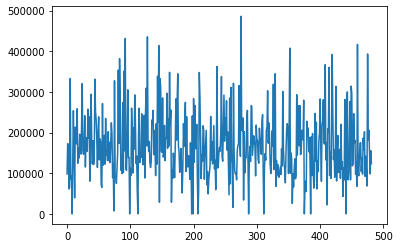

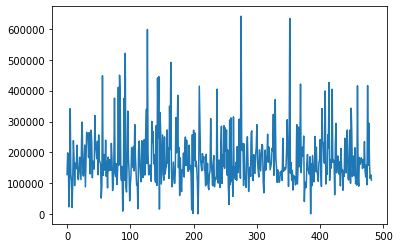

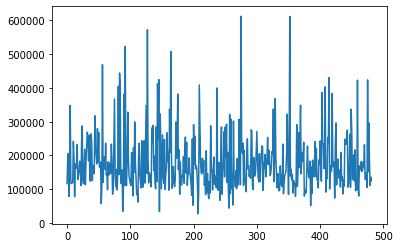

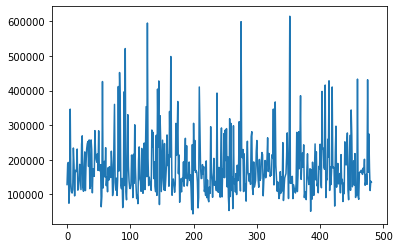

<Figure size 432x288 with 0 Axes>

In [ ]:
axs1 = plt.plot(prediction1)
plt.show()
plt.clf()
axs2 = plt.plot(prediction2)
plt.show()
plt.clf()
axs3 = plt.plot(prediction3)
plt.show()
plt.clf()
axs4 = plt.plot(prediction4)
plt.show()
plt.clf()

In [ ]:
predictions3

array([[116791.77 ],
       [184346.83 ],
       [206065.08 ],
       [ 78831.29 ],
       [121419.98 ],
       [348157.44 ],
       [124767.55 ],
       [117170.88 ],
       [118640.24 ],
       [119943.98 ],
       [241764.34 ],
       [190028.67 ],
       [ 77943.09 ],
       [174677.6  ],
       [160795.17 ],
       [178867.1  ],
       [231923.66 ],
       [128826.414],
       [140426.22 ],
       [152888.08 ],
       [183495.52 ],
       [158379.52 ],
       [111145.66 ],
       [243049.34 ],
       [287376.03 ],
       [128099.73 ],
       [116670.414],
       [171389.66 ],
       [218694.78 ],
       [112854.484],
       [184865.   ],
       [228918.28 ],
       [268997.34 ],
       [257438.06 ],
       [184322.38 ],
       [259827.3  ],
       [128044.67 ],
       [123885.586],
       [263989.5  ],
       [238492.1  ],
       [125693.99 ],
       [170258.16 ],
       [156689.06 ],
       [146335.42 ],
       [317545.84 ],
       [218315.03 ],
       [203701.08 ],
       [17520

In [ ]:
final_prediction = prediction3

submission = pd.DataFrame()
submission['SalePrice'] = final_prediction.tolist

submission.to_csv('submission.csv')